In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
data = pd.read_csv("data.csv")
data = data.dropna(axis=1)

X = data.drop(columns=['id', 'diagnosis']).values
y = data['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

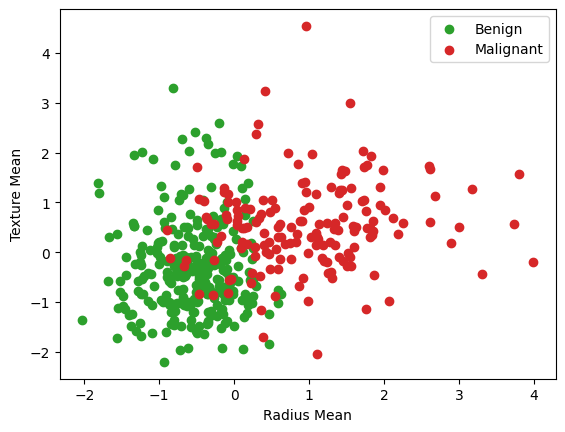

In [13]:
plt.scatter(X_train[y_train == 'B', 0], X_train[y_train == 'B', 1], color='tab:green', label='Benign')
plt.scatter(X_train[y_train == 'M', 0], X_train[y_train == 'M', 1], color='tab:red', label='Malignant')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend()
plt.show()

In [8]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((b - a) ** 2))

In [28]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self._predict(x) for x in X])


    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [29]:
knn = KNN(7)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = np.mean(predictions == y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 97.37%


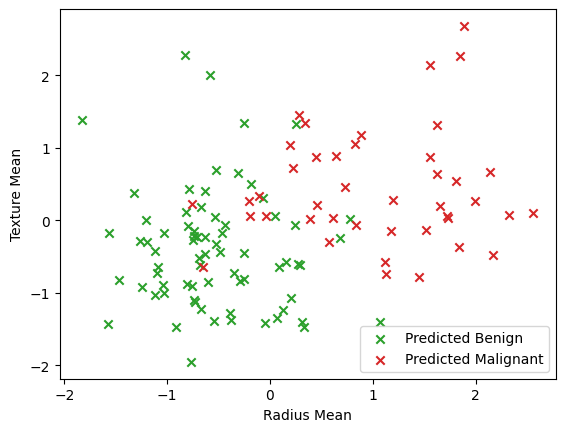

In [30]:
plt.scatter(X_test[predictions == 'B', 0], X_test[predictions == 'B', 1], color='tab:green', label='Predicted Benign', marker='x')
plt.scatter(X_test[predictions == 'M', 0], X_test[predictions == 'M', 1], color='tab:red', label='Predicted Malignant', marker='x')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend()
plt.show()

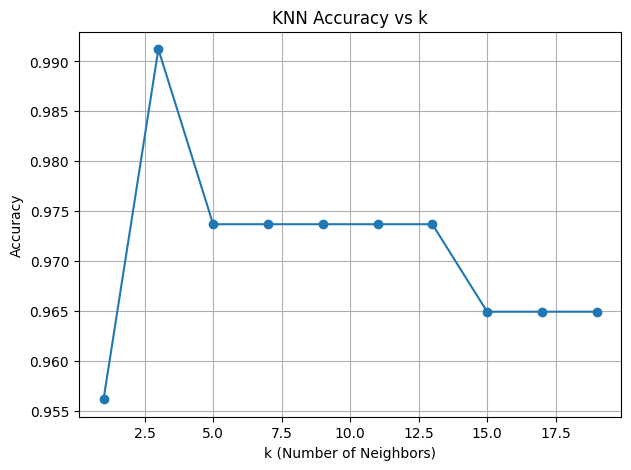

In [31]:
ks = range(1, 21, 2)
accuracies = []

for k in ks:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    acc = np.mean(preds == y_test)
    accuracies.append(acc)

plt.figure(figsize=(7,5))
plt.plot(ks, accuracies, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.grid(True)
plt.show()

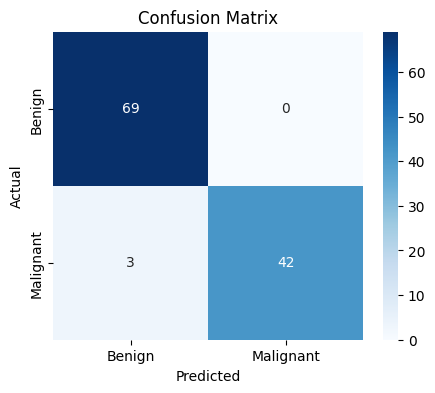

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions, labels=['B', 'M'])

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=['Benign', 'Malignant'],
    yticklabels=['Benign', 'Malignant']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

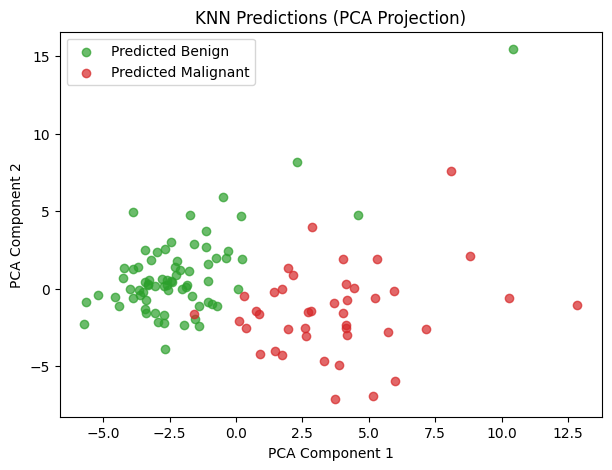

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

plt.figure(figsize=(7,5))

plt.scatter(
    X_test_pca[predictions == 'B', 0],
    X_test_pca[predictions == 'B', 1],
    color='tab:green',
    label='Predicted Benign',
    alpha=0.7
)

plt.scatter(
    X_test_pca[predictions == 'M', 0],
    X_test_pca[predictions == 'M', 1],
    color='tab:red',
    label='Predicted Malignant',
    alpha=0.7
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KNN Predictions (PCA Projection)")
plt.legend()
plt.show()
